In [1]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# definir parâmetros extras
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

In [3]:
# carregar arquivo de dados de treino
data = pd.read_csv('heart-train.csv', index_col='Paciente')

# substituir valor '?' por nulo
data.replace('?', np.nan, inplace=True)

# converter tipos para numérico
for col in ['PAR', 'CS', 'FCM', 'DST']:
    data[col] = data[col].astype(float)
for col in ['ASJ', 'ECG', 'AIE', 'IST', 'NVP', 'Talassemia']:
    data[col] = data[col].astype(float)

# mostrar alguns exemplos de registros
data.head()

,Hospital,Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia,Diagnóstico
Paciente,,,,,,,,,,,,,,,
262,C,60,F,1,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0,A
520,H,54,M,4,125.0,224.0,0.0,0.0,122.0,0.0,2.0,2.0,NaN,NaN,P
264,C,61,M,4,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,P
674,S,60,M,3,115.0,0.0,NaN,0.0,143.0,0.0,2.4,1.0,NaN,NaN,P
102,C,57,F,4,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0,A


In [4]:
# quantos vinhos existem de cada qualidade?
data['Diagnóstico'].value_counts()

P    350
A    263
Name: Diagnóstico, dtype: int64

In [5]:
data.iloc[:,:-1].head()

,Hospital,Idade,Sexo,TDP,PAR,CS,ASJ,ECG,FCM,AIE,DST,IST,NVP,Talassemia
Paciente,,,,,,,,,,,,,,
262,C,60,F,1,150.0,240.0,0.0,0.0,171.0,0.0,0.9,1.0,0.0,3.0
520,H,54,M,4,125.0,224.0,0.0,0.0,122.0,0.0,2.0,2.0,NaN,NaN
264,C,61,M,4,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0
674,S,60,M,3,115.0,0.0,NaN,0.0,143.0,0.0,2.4,1.0,NaN,NaN
102,C,57,F,4,128.0,303.0,0.0,2.0,159.0,0.0,0.0,1.0,1.0,3.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


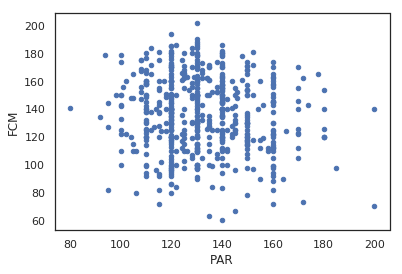

In [6]:
# gerar gráfico de dispersão simples
data.plot(kind="scatter", x="PAR", y="FCM")

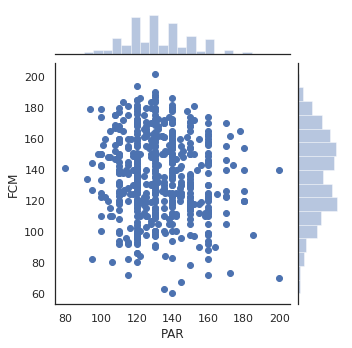

In [7]:
# gerar gráfico de dispersão com histograma usando o pacote seaborn
sns.jointplot(x="PAR", y="FCM", data=data, size=5, )

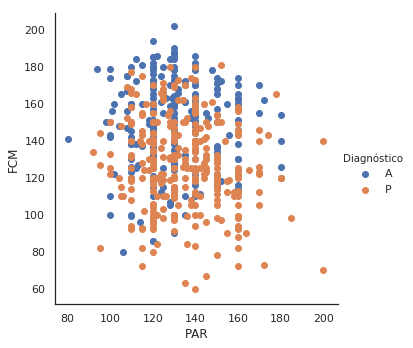

In [8]:
# gerar gráfico similar usando a espécie na cor
sns.FacetGrid(data, hue="Diagnóstico", size=5) \
   .map(plt.scatter, "PAR", "FCM") \
   .add_legend()

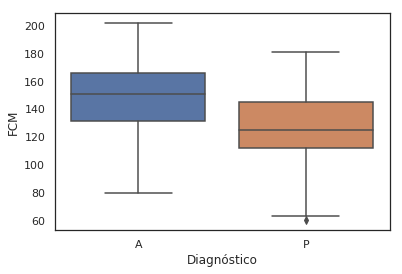

In [9]:
# gerar um gráfico do tipo boxplot sobre uma característica individual
sns.boxplot(x="Diagnóstico", y="FCM", data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc60a9d6a0>,
      dtype=object)

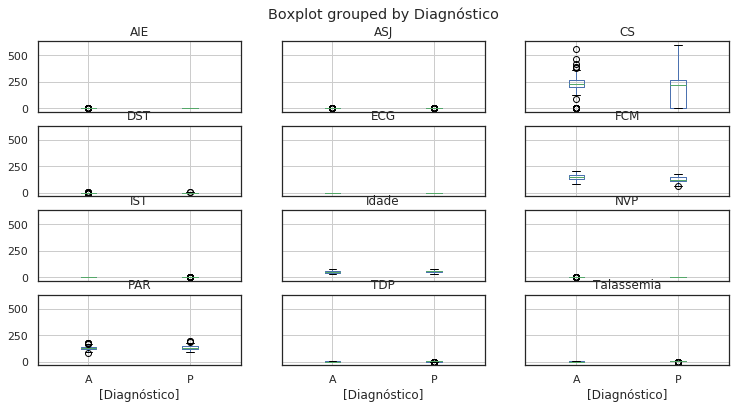

In [10]:
# gerar boxplot para cada uma das características por espécie
data.boxplot(by="Diagnóstico", figsize=(12, 6))

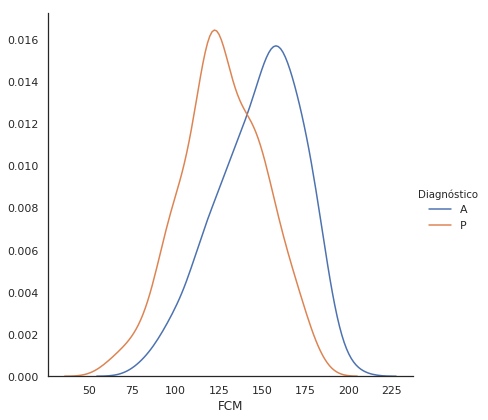

In [11]:
# gerar gráfico kde (densidade de kernel) sobre uma característica
sns.FacetGrid(data, hue="Diagnóstico", size=6) \
   .map(sns.kdeplot, "FCM") \
   .add_legend()

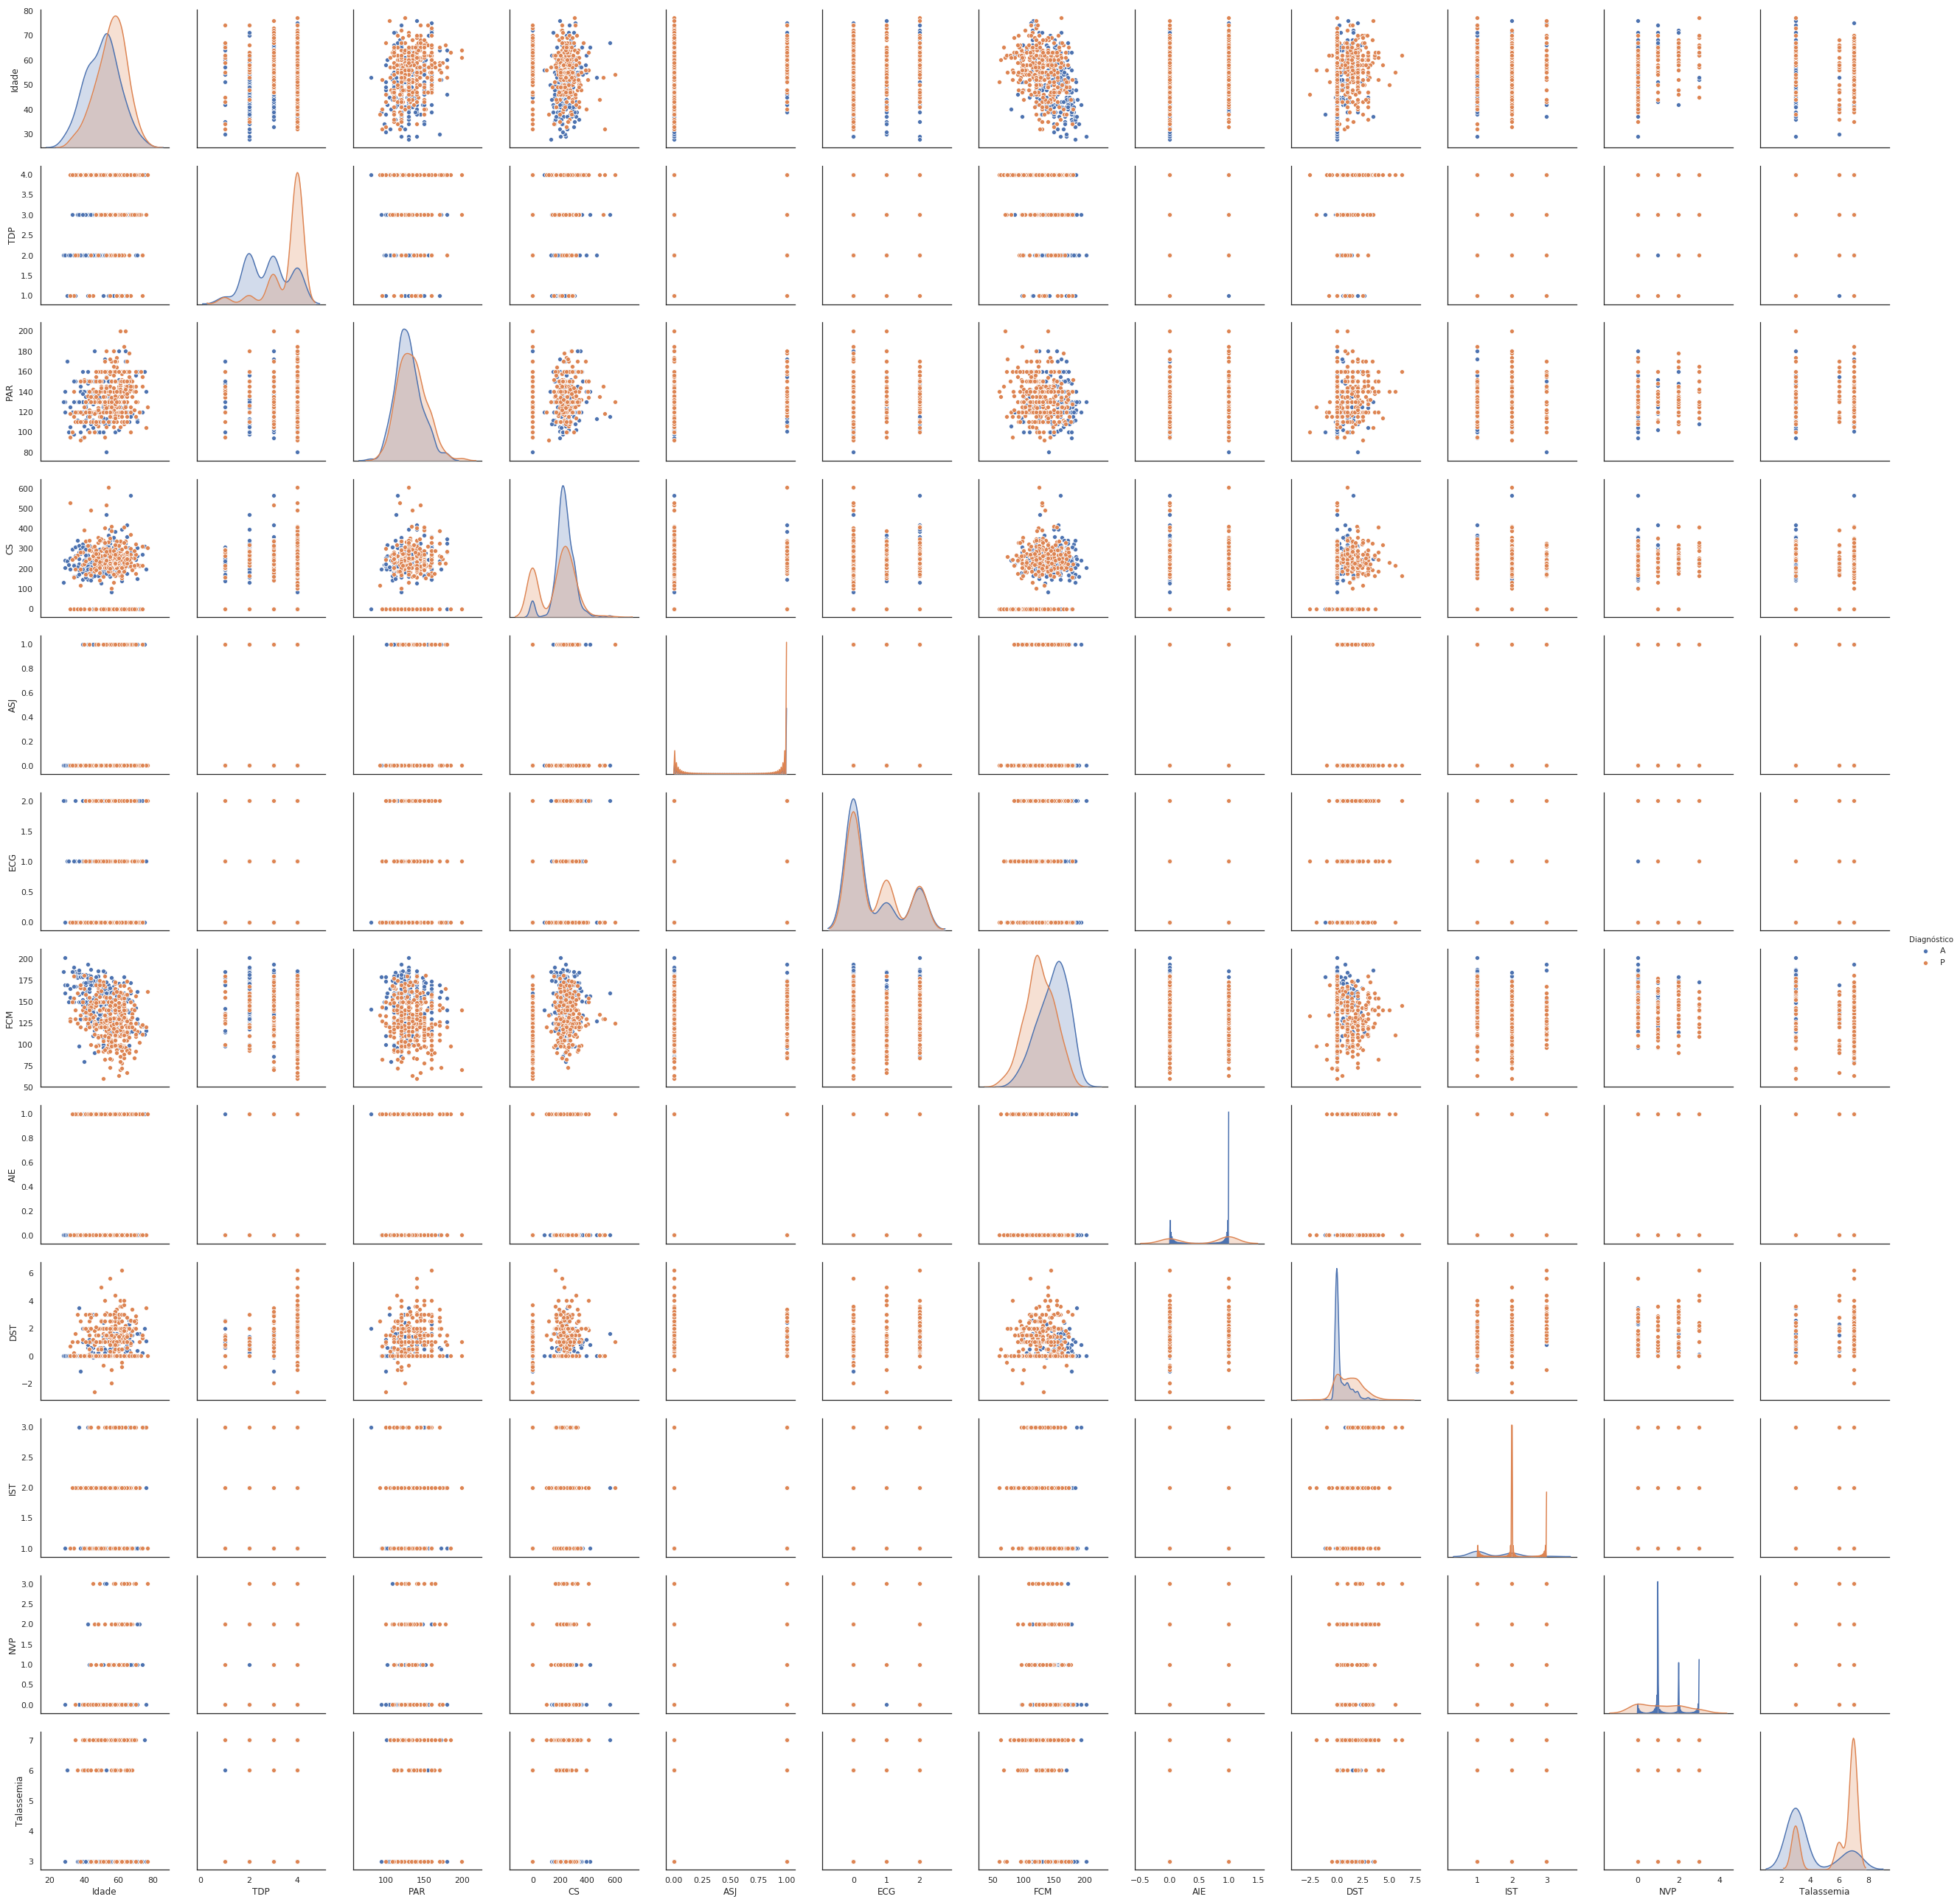

In [12]:
# gerar gráfico para analisar pares de características
sns.pairplot(data, hue="Diagnóstico", size=3)

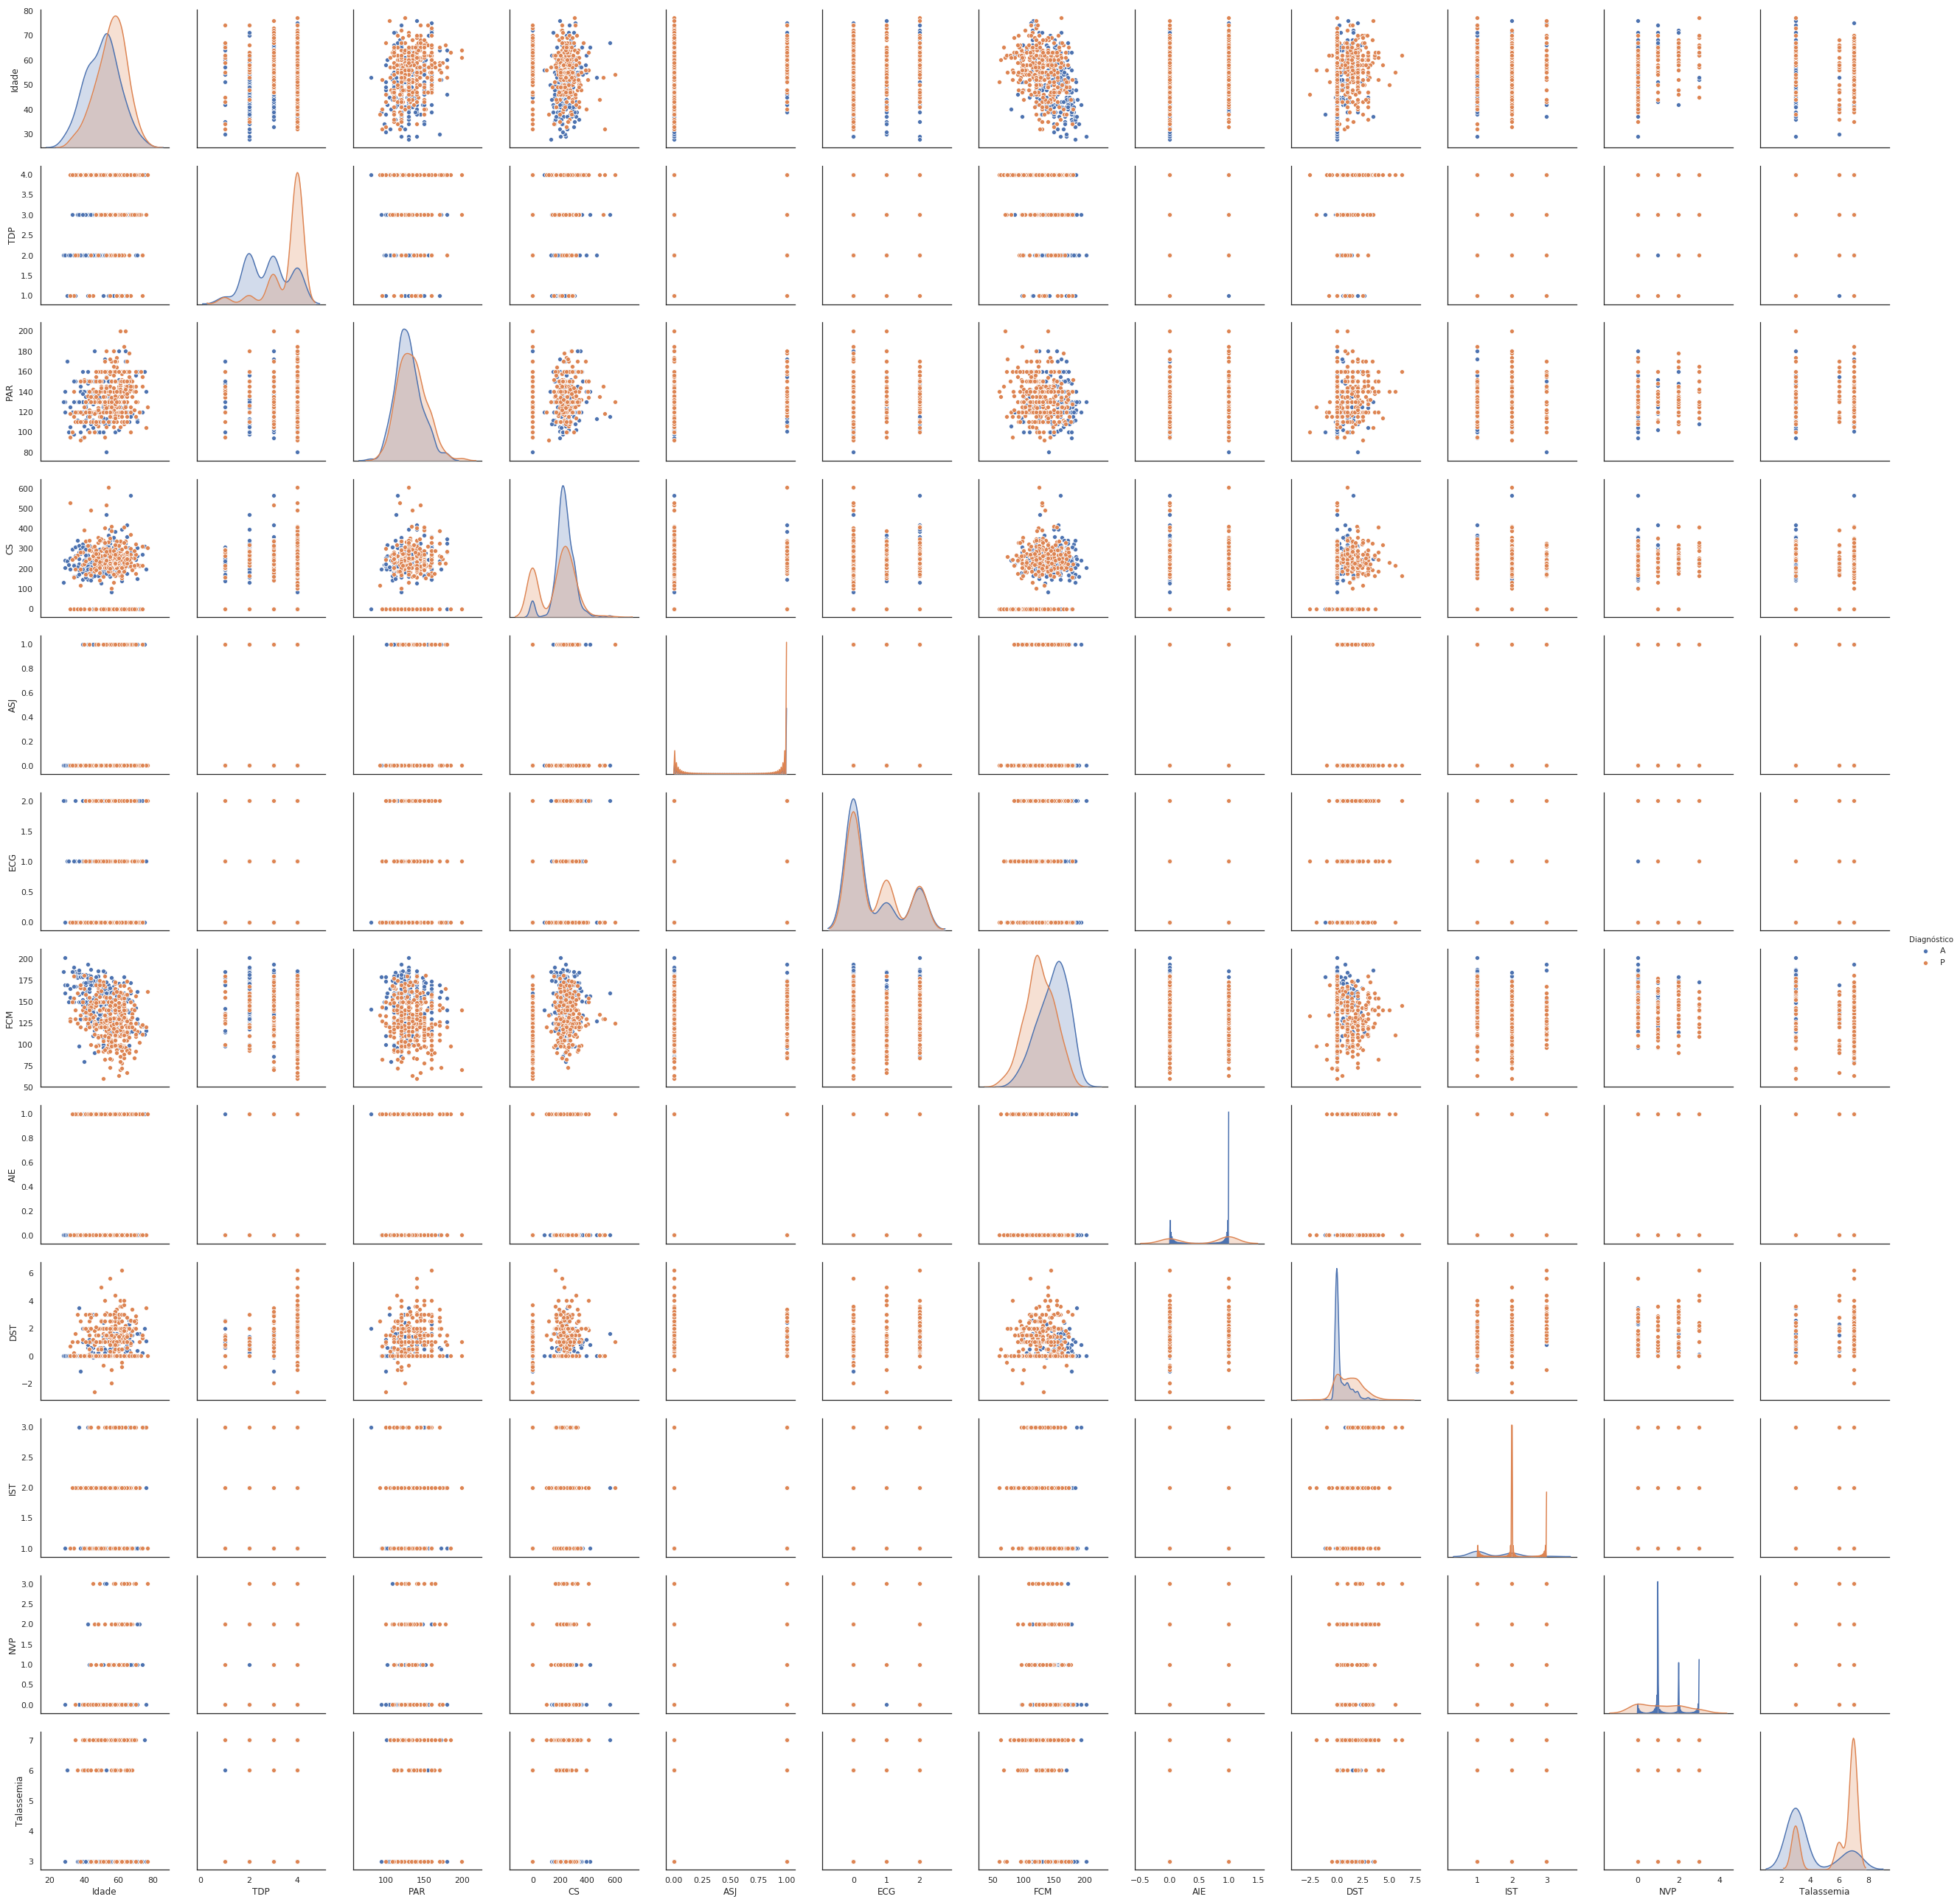

In [13]:
# gerar gráfico em pares com kde nas diagonais
sns.pairplot(data, hue="Diagnóstico", size=3, diag_kind="kde")

In [14]:
data['Doente'] = data['Diagnóstico'].map({'P': 1, 'A': 0})

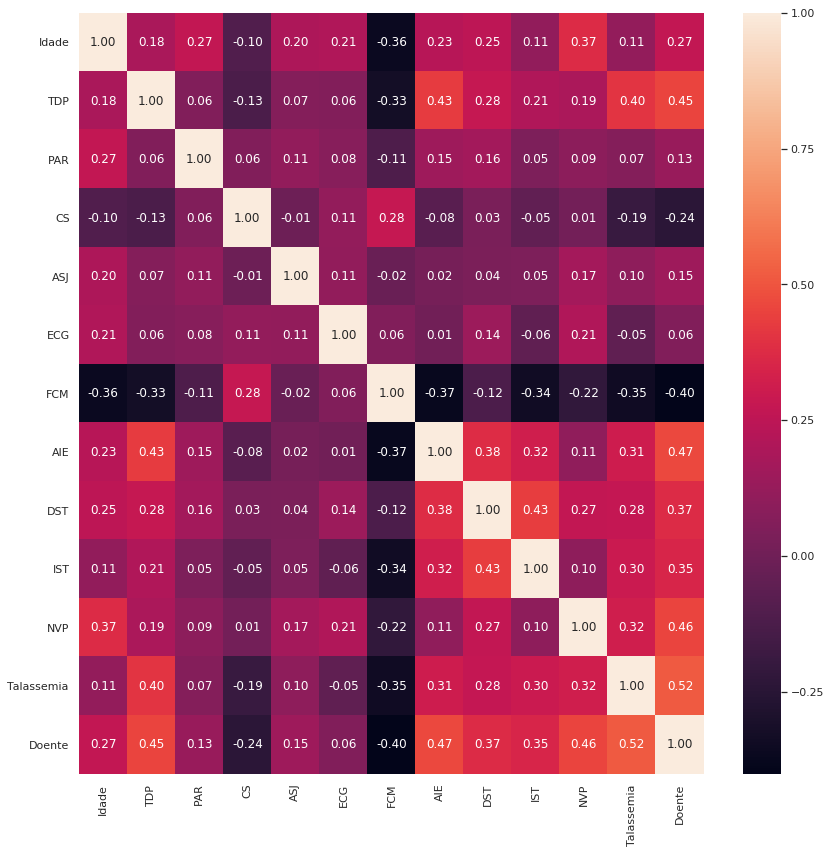

In [15]:
# gerar mapa de calor com a correlação das características
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [16]:
data.columns.values

array(['Hospital', 'Idade', 'Sexo', 'TDP', 'PAR', 'CS', 'ASJ', 'ECG',
       'FCM', 'AIE', 'DST', 'IST', 'NVP', 'Talassemia', 'Diagnóstico',
       'Doente'], dtype=object)

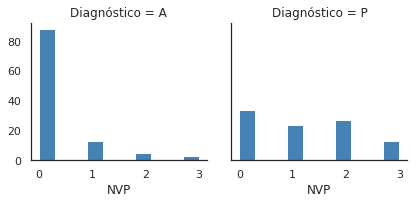

In [17]:
g = sns.FacetGrid(data, col="Diagnóstico", margin_titles=True)
#bins = np.linspace(0, 60, 13)
g.map(plt.hist, "NVP", color="steelblue") #, bins=bins)

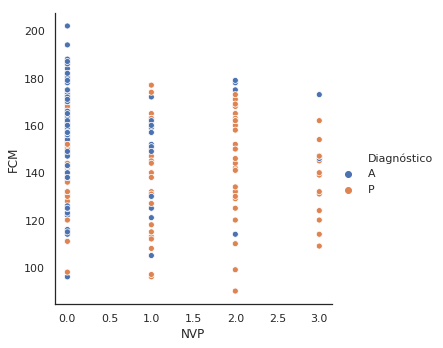

In [18]:
sns.relplot(x="NVP", y="FCM", hue="Diagnóstico", data=data)

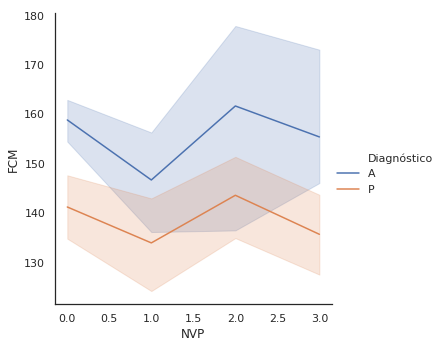

In [19]:
sns.relplot(x="NVP", y="FCM", hue="Diagnóstico", kind="line", data=data)

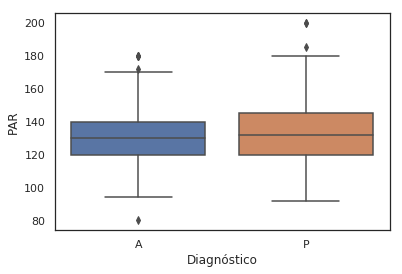

In [20]:
sns.boxplot(x="Diagnóstico", y="PAR", data=data)